# Methodology (Deliverable 3):
* Use X_encoded_dummies.csv to create dataframe of feature matrix (X)
* Note the extent of imbalance among values in the target variable (y)
* Pre-processing: set aside 25 % of the data for testing (using train-test-split)
* Note: BalancedRandomForestClassifier and EasyEnsembleClassifier(AdaBoost) do not require scaling of the feature matrix (X)
* Model, fit predict and assess the two ensemble learning methods

    - BalancedRandomForestClassifier
        * balanced accuracy score
        * confusion matrix
        * balanced classification report 
        * feature importantance (for BalancedRandomForestClassifier only) <br><br>
    
    - EasyEnsembleClassifier(AdaBoost)
        * balanced accuracy score
        * confusion matrix
        * balanced classification report <br><br>
        
* Record findings in README.md file to include images of confusion matrix, balanced classification report and feature importance (if applicable)        

## Preprocessing

### Import Libraries
Note: a new python 3.7 evnironment called mlenv was created for this analysis
Note: an additional libary dataframe_image was added to the mlenv environment

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

import matplotlib.pyplot as plt

import dataframe_image as dfi

In [3]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier

In [5]:
# Load the clean_loans cvs file
file_path = Path('./Data/X_encoded_dummies.csv')
X = pd.read_csv(file_path)
X

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,issue_d_Feb-2019,issue_d_Jan-2019,issue_d_Mar-2019,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App
0,10500.0,0.1719,375.35,66000.0,27.24,0.0,0.0,8.0,0.0,1609.0,...,0,0,0,1,0,1,0,1,1,0
1,25000.0,0.2000,929.09,105000.0,20.23,0.0,0.0,17.0,1.0,18368.0,...,1,0,0,1,0,1,0,1,1,0
2,20000.0,0.2000,529.88,56000.0,24.26,0.0,0.0,8.0,0.0,13247.0,...,1,0,0,1,0,1,0,1,1,0
3,10000.0,0.1640,353.55,92000.0,31.44,0.0,1.0,10.0,1.0,17996.0,...,1,0,0,1,0,1,0,1,1,0
4,22000.0,0.1474,520.39,52000.0,18.76,0.0,1.0,14.0,0.0,9091.0,...,0,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71022,12000.0,0.2727,368.37,63000.0,29.07,0.0,0.0,8.0,0.0,13314.0,...,0,0,1,0,0,1,0,1,1,0
71023,5000.0,0.1992,185.62,52000.0,14.86,0.0,0.0,5.0,1.0,3715.0,...,0,0,1,0,0,1,0,1,1,0
71024,40000.0,0.0646,1225.24,520000.0,9.96,0.0,1.0,21.0,0.0,59529.0,...,1,0,1,0,1,0,0,1,1,0
71025,16000.0,0.1131,350.36,72000.0,7.02,2.0,0.0,12.0,1.0,11882.0,...,1,0,1,0,0,1,0,1,1,0


In [6]:
# examine the shape
X.shape

(71027, 85)

In [7]:
# Load y from the y.csv file in Data folder
y = pd.read_csv("./Data/y.csv")
y

,loan_status
0,low_risk
1,low_risk
2,low_risk
3,low_risk
4,low_risk
...,...
71022,low_risk
71023,low_risk
71024,low_risk
71025,low_risk


In [8]:
# confirm the shape of y
y.shape

(71027, 1)

### Split the Data into Training and Testing

In [9]:
# Examine the features matrix
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71027 entries, 0 to 71026
Data columns (total 85 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            71027 non-null  float64
 1   int_rate                             71027 non-null  float64
 2   installment                          71027 non-null  float64
 3   annual_inc                           71027 non-null  float64
 4   dti                                  71027 non-null  float64
 5   delinq_2yrs                          71027 non-null  float64
 6   inq_last_6mths                       71027 non-null  float64
 7   open_acc                             71027 non-null  float64
 8   pub_rec                              71027 non-null  float64
 9   revol_bal                            71027 non-null  float64
 10  total_acc                            71027 non-null  float64
 11  out_prncp                   

In [10]:
# Create our target
# y = df['loan_status']
y.value_counts()

loan_status
low_risk       70669
high_risk        358
dtype: int64

In [11]:
X.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,issue_d_Feb-2019,issue_d_Jan-2019,issue_d_Mar-2019,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App
count,71027.000000,71027.000000,71027.000000,7.102700e+04,71027.000000,71027.000000,71027.000000,71027.000000,71027.000000,71027.000000,...,71027.000000,71027.000000,71027.000000,71027.000000,71027.000000,71027.000000,71027.000000,71027.000000,71027.000000,71027.000000
mean,16701.921452,0.128636,482.253956,8.852203e+04,21.756772,0.225647,0.510200,12.571248,0.125121,18017.618666,...,0.155209,0.372577,0.448548,0.178876,0.123657,0.876343,0.383826,0.616174,0.864685,0.135315
std,10253.207248,0.048335,288.584068,1.146235e+05,19.936996,0.737205,0.772191,6.013969,0.335927,22640.570431,...,0.362106,0.483494,0.497349,0.383251,0.329192,0.329192,0.486320,0.486320,0.342062,0.342062
min,1000.000000,0.060000,30.890000,4.000000e+01,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9400.000000,0.088100,266.560000,5.070000e+04,13.920000,0.000000,0.000000,8.000000,0.000000,6374.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,15000.000000,0.118000,405.910000,7.300000e+04,19.790000,0.000000,0.000000,11.000000,0.000000,12229.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,24000.000000,0.161400,648.450000,1.040000e+05,26.670000,0.000000,1.000000,16.000000,0.000000,22059.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,40000.000000,0.308900,1676.230000,8.797500e+06,999.000000,18.000000,5.000000,72.000000,4.000000,587191.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
X.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,issue_d_Feb-2019,issue_d_Jan-2019,issue_d_Mar-2019,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App
0,10500.0,0.1719,375.35,66000.0,27.24,0.0,0.0,8.0,0.0,1609.0,...,0,0,0,1,0,1,0,1,1,0
1,25000.0,0.2000,929.09,105000.0,20.23,0.0,0.0,17.0,1.0,18368.0,...,1,0,0,1,0,1,0,1,1,0
2,20000.0,0.2000,529.88,56000.0,24.26,0.0,0.0,8.0,0.0,13247.0,...,1,0,0,1,0,1,0,1,1,0
3,10000.0,0.1640,353.55,92000.0,31.44,0.0,1.0,10.0,1.0,17996.0,...,1,0,0,1,0,1,0,1,1,0
4,22000.0,0.1474,520.39,52000.0,18.76,0.0,1.0,14.0,0.0,9091.0,...,0,0,0,1,0,1,0,1,1,0


In [13]:
X.shape

(71027, 85)

In [14]:
# # use get_dummies to transform object dtypes into int 
# X_encoded = pd.get_dummies(X)
# X_encoded.shape

In [15]:
# Check the balance of our target values
# y['loan_status'].value_counts()

In [16]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [17]:
# examine y_train counts
y_train.value_counts()

loan_status
low_risk       52996
high_risk        274
dtype: int64

# Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble AdaBoost classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Print the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier onely, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [18]:
# Resample the training data with the BalancedRandomForestClassifier

# model
brf_model = BalancedRandomForestClassifier(n_estimators= 100,random_state=1)

# fit
brf_model = brf_model.fit(X_train, y_train)

# predict
predictions = brf_model.predict(X_test)

In [19]:
# Calculated the balanced accuracy score
print(f"The balanced accuracy score is: {balanced_accuracy_score(y_test, predictions):.3f}")

The balanced accuracy score is: 0.827


In [20]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[   62,    22],
       [ 1499, 16174]], dtype=int64)

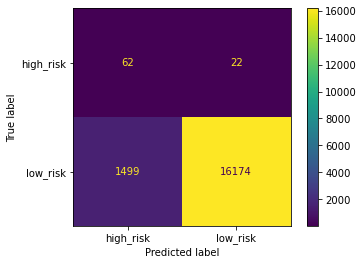

In [21]:
# confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= brf_model.classes_)
disp.plot()

# save the image
plt.savefig("./Images/BalancedRandomForestClassifier_confusion_matrix.png")
plt.show()

In [22]:
# Print the imbalanced classification report
report = classification_report_imbalanced(y_test, predictions)
print("BalancedRandomForestClassifier")
print(report)

BalancedRandomForestClassifier
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.04      0.74      0.92      0.08      0.82      0.66        84
   low_risk       1.00      0.92      0.74      0.96      0.82      0.69     17673

avg / total       0.99      0.91      0.74      0.95      0.82      0.69     17757



In [23]:
# List the features sorted in descending order by feature importance
important_features = brf_model.feature_importances_

# put this together in a dataframe
# get the column names
cols = X.columns

# create the dataframe
important_features_df = pd.DataFrame({'feature': cols, 'importance': important_features})
important_features_df

,feature,importance
0,loan_amnt,0.010144
1,int_rate,0.022974
2,installment,0.015872
3,annual_inc,0.014420
4,dti,0.018602
...,...,...
80,initial_list_status_w,0.000957
81,next_pymnt_d_Apr-2019,0.003194
82,next_pymnt_d_May-2019,0.004092
83,application_type_Individual,0.000852


In [24]:
# sort in desc order
print("BalancedRandomForestClassifier")
important_features_df.sort_values('importance', ascending=False).head(10)

BalancedRandomForestClassifier


,feature,importance
16,total_rec_int,0.080260
18,last_pymnt_amnt,0.078622
15,total_rec_prncp,0.063961
13,total_pymnt,0.056555
14,total_pymnt_inv,0.045212
77,issue_d_Jan-2019,0.023870
1,int_rate,0.022974
4,dti,0.018602
31,max_bal_bc,0.018254
2,installment,0.015872


In [31]:
# export the feature importance dataframe using dataframe-image
dfi.export(important_features_df, "./Images/BalancedRandomForestClassifier_important_features.png")

### Easy Ensemble AdaBoost Classifier

In [25]:
# Train the EasyEnsembleClassifier

# model
ee_clf = EasyEnsembleClassifier(n_estimators=100, random_state=1)

# fit/train
ee_clf.fit(X_train, y_train)

# predict
y_pred = ee_clf.predict(X_test)

In [26]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred)

0.9416351415799726

In [27]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[   79,     5],
       [ 1011, 16662]], dtype=int64)

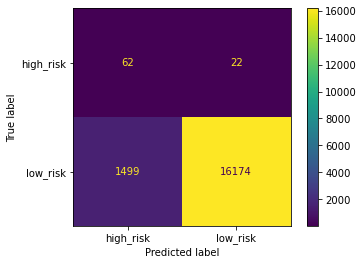

In [28]:
# confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= ee_clf.classes_)
disp.plot()

# save the image
plt.savefig("./Images/EasyEnsembleClassifier_confusion_matrix.png")
plt.show()

In [29]:
# Print the imbalanced classification report
print("EasyEnsembleClassifier")
print(classification_report_imbalanced(y_test, y_pred))

EasyEnsembleClassifier
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.07      0.94      0.94      0.13      0.94      0.89        84
   low_risk       1.00      0.94      0.94      0.97      0.94      0.89     17673

avg / total       1.00      0.94      0.94      0.97      0.94      0.89     17757

